# Golf

Ported from Eric Novik's [`Stan` example](https://github.com/ericnovik/golf).

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
from scipy import stats as st

from utils import plt, sns

In [2]:
df = pd.read_csv("data/golf.csv")
print len(df)
df.head()

19


,distance,success,tries
0,1,1346,1443
1,2,577,694
2,3,337,455
3,4,208,353
4,5,149,272


(0, 20)

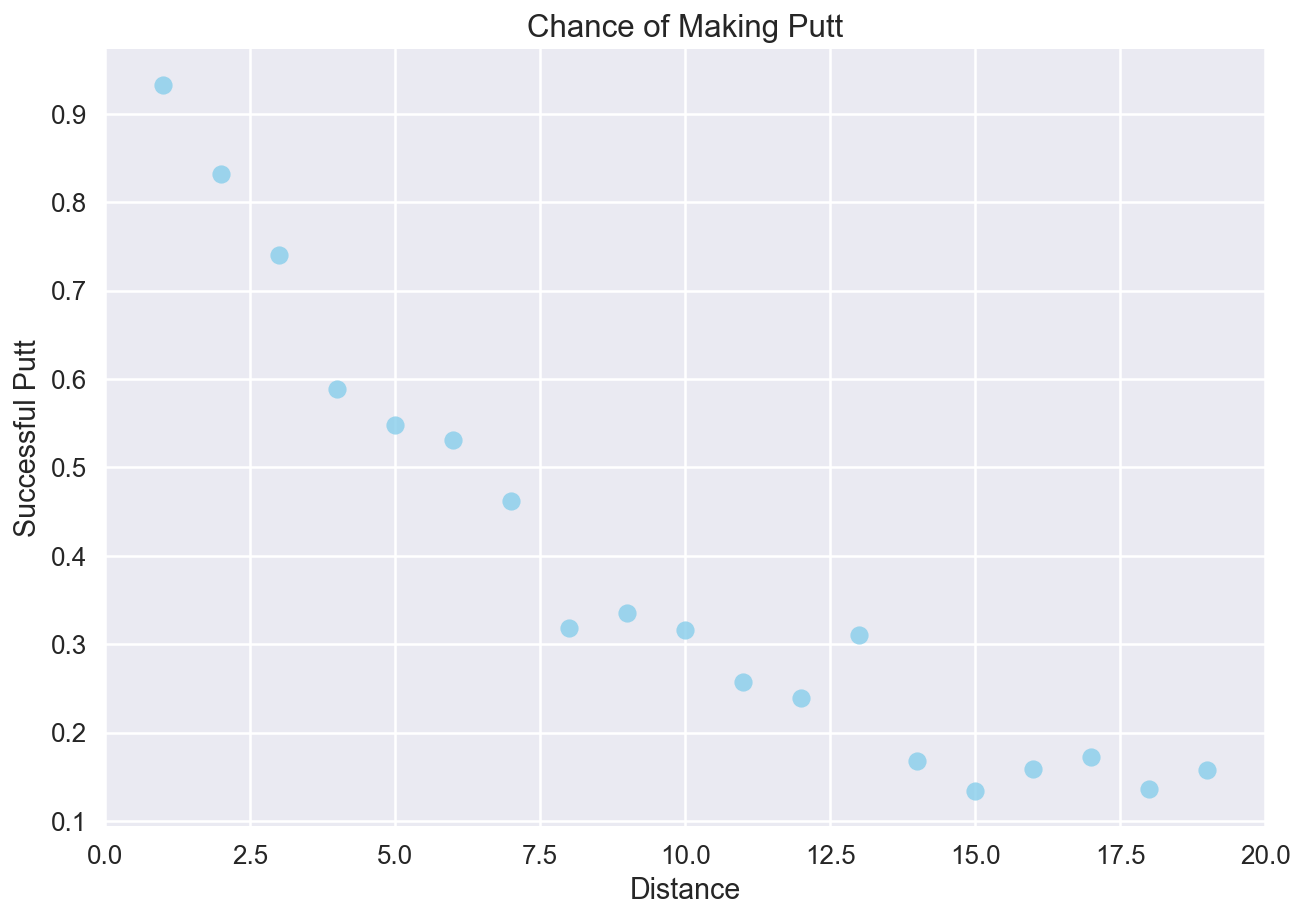

In [3]:
sns.regplot(df.distance, df.success/df.tries, fit_reg=False)
plt.title("Chance of Making Putt")
plt.ylabel("Successful Putt")
plt.xlabel("Distance")
plt.xlim(0, 20)

In [4]:
def probit_phi(x):
    """ Probit transform assuming 0 mean and 1 sd """
    # http://stackoverflow.com/questions/21849494/
    mu, sd = 0, 1
    return 0.5 * (1 + tt.erf((x - mu) / (sd * tt.sqrt(2))))

tin_cup_radius = (4.25 - 1.68) / 2.0
putt_chance = np.sin(tin_cup_radius / df.distance.values)

In [5]:
with pm.Model() as model:
    # Priors
    sigma = pm.HalfCauchy("sigma", 2.5)
    theta = probit_phi(1.0 / sigma * putt_chance)
    probability = 2.0 * theta - 1.0

    # Likelihood
    y = pm.Binomial("y", df.tries.values, probability, shape=19)
    
    # Sample
    trace = pm.sample(draws=20000, tune=5000, njobs=4, chain=4)
    
burn_in = 10000
trace = trace[burn_in:]

Assigned NUTS to sigma_log_
Assigned Metropolis to y
100%|██████████| 20000/20000 [00:18<00:00, 1064.65it/s]


             mean         sd  mc_error     hpd_2.5    hpd_97.5
y__0   424.552800  56.600331  5.633383  338.000000  574.000000
y__1   130.486775  18.345814  1.755625  102.000000  173.000000
y__2    58.997975   9.530641  0.824083   41.000000   78.000000
y__3    35.613450   7.595316  0.644626   21.000000   51.000000
y__4    21.606350   5.004892  0.354956   12.000000   31.000000
y__5    17.169225   4.774609  0.325994    8.000000   26.000000
y__6    13.753400   4.065629  0.253402    6.000000   21.000000
y__7    10.923000   3.553621  0.204676    5.000000   18.000000
y__8     9.035950   3.239376  0.192573    3.000000   15.000000
y__9     9.586800   3.380098  0.189992    3.000000   16.000000
y__10    7.412950   2.902675  0.147145    2.000000   13.000000
y__11    6.586875   2.746535  0.133314    2.000000   12.000000
y__12    5.553725   2.620499  0.132809    0.000000   10.000000
y__13    4.871950   2.332274  0.101642    1.000000    9.000000
y__14    5.440575   2.413217  0.105074    1.000000   10

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1129b59d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c9228d0>]], dtype=object)

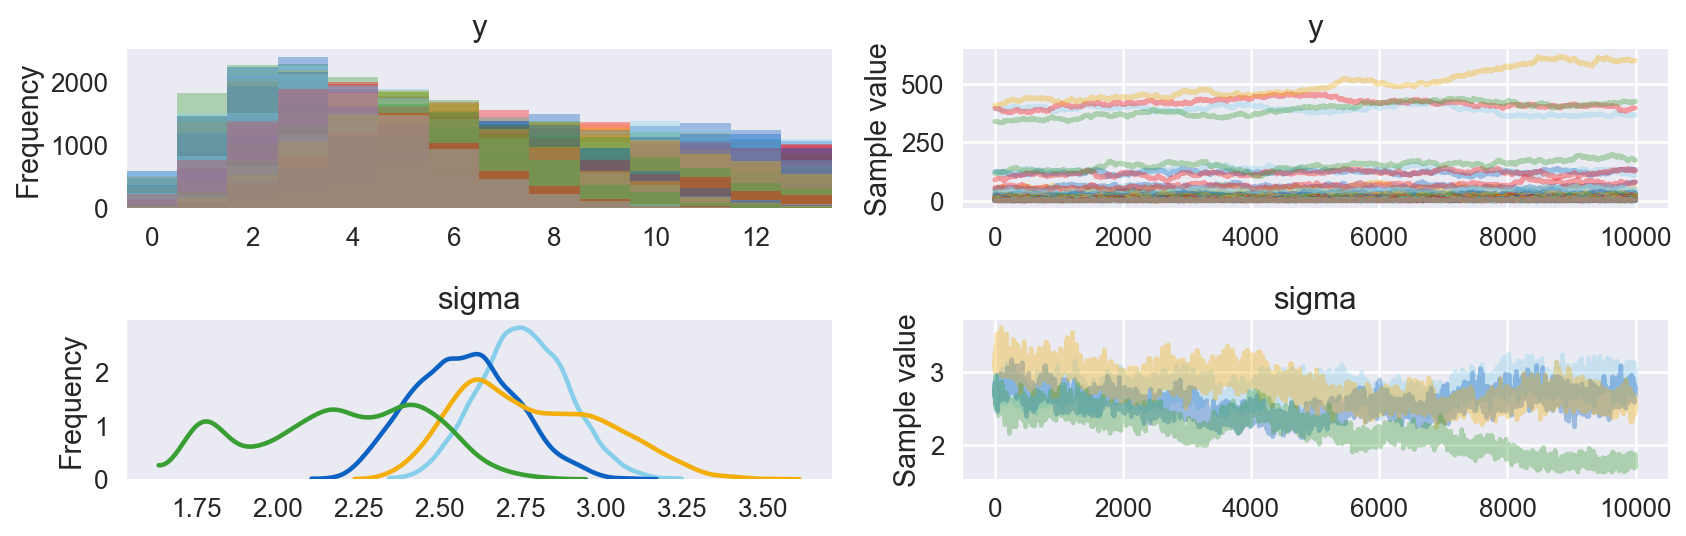

In [6]:
print(pm.df_summary(trace))
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115a15410>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118f31cd0>], dtype=object)

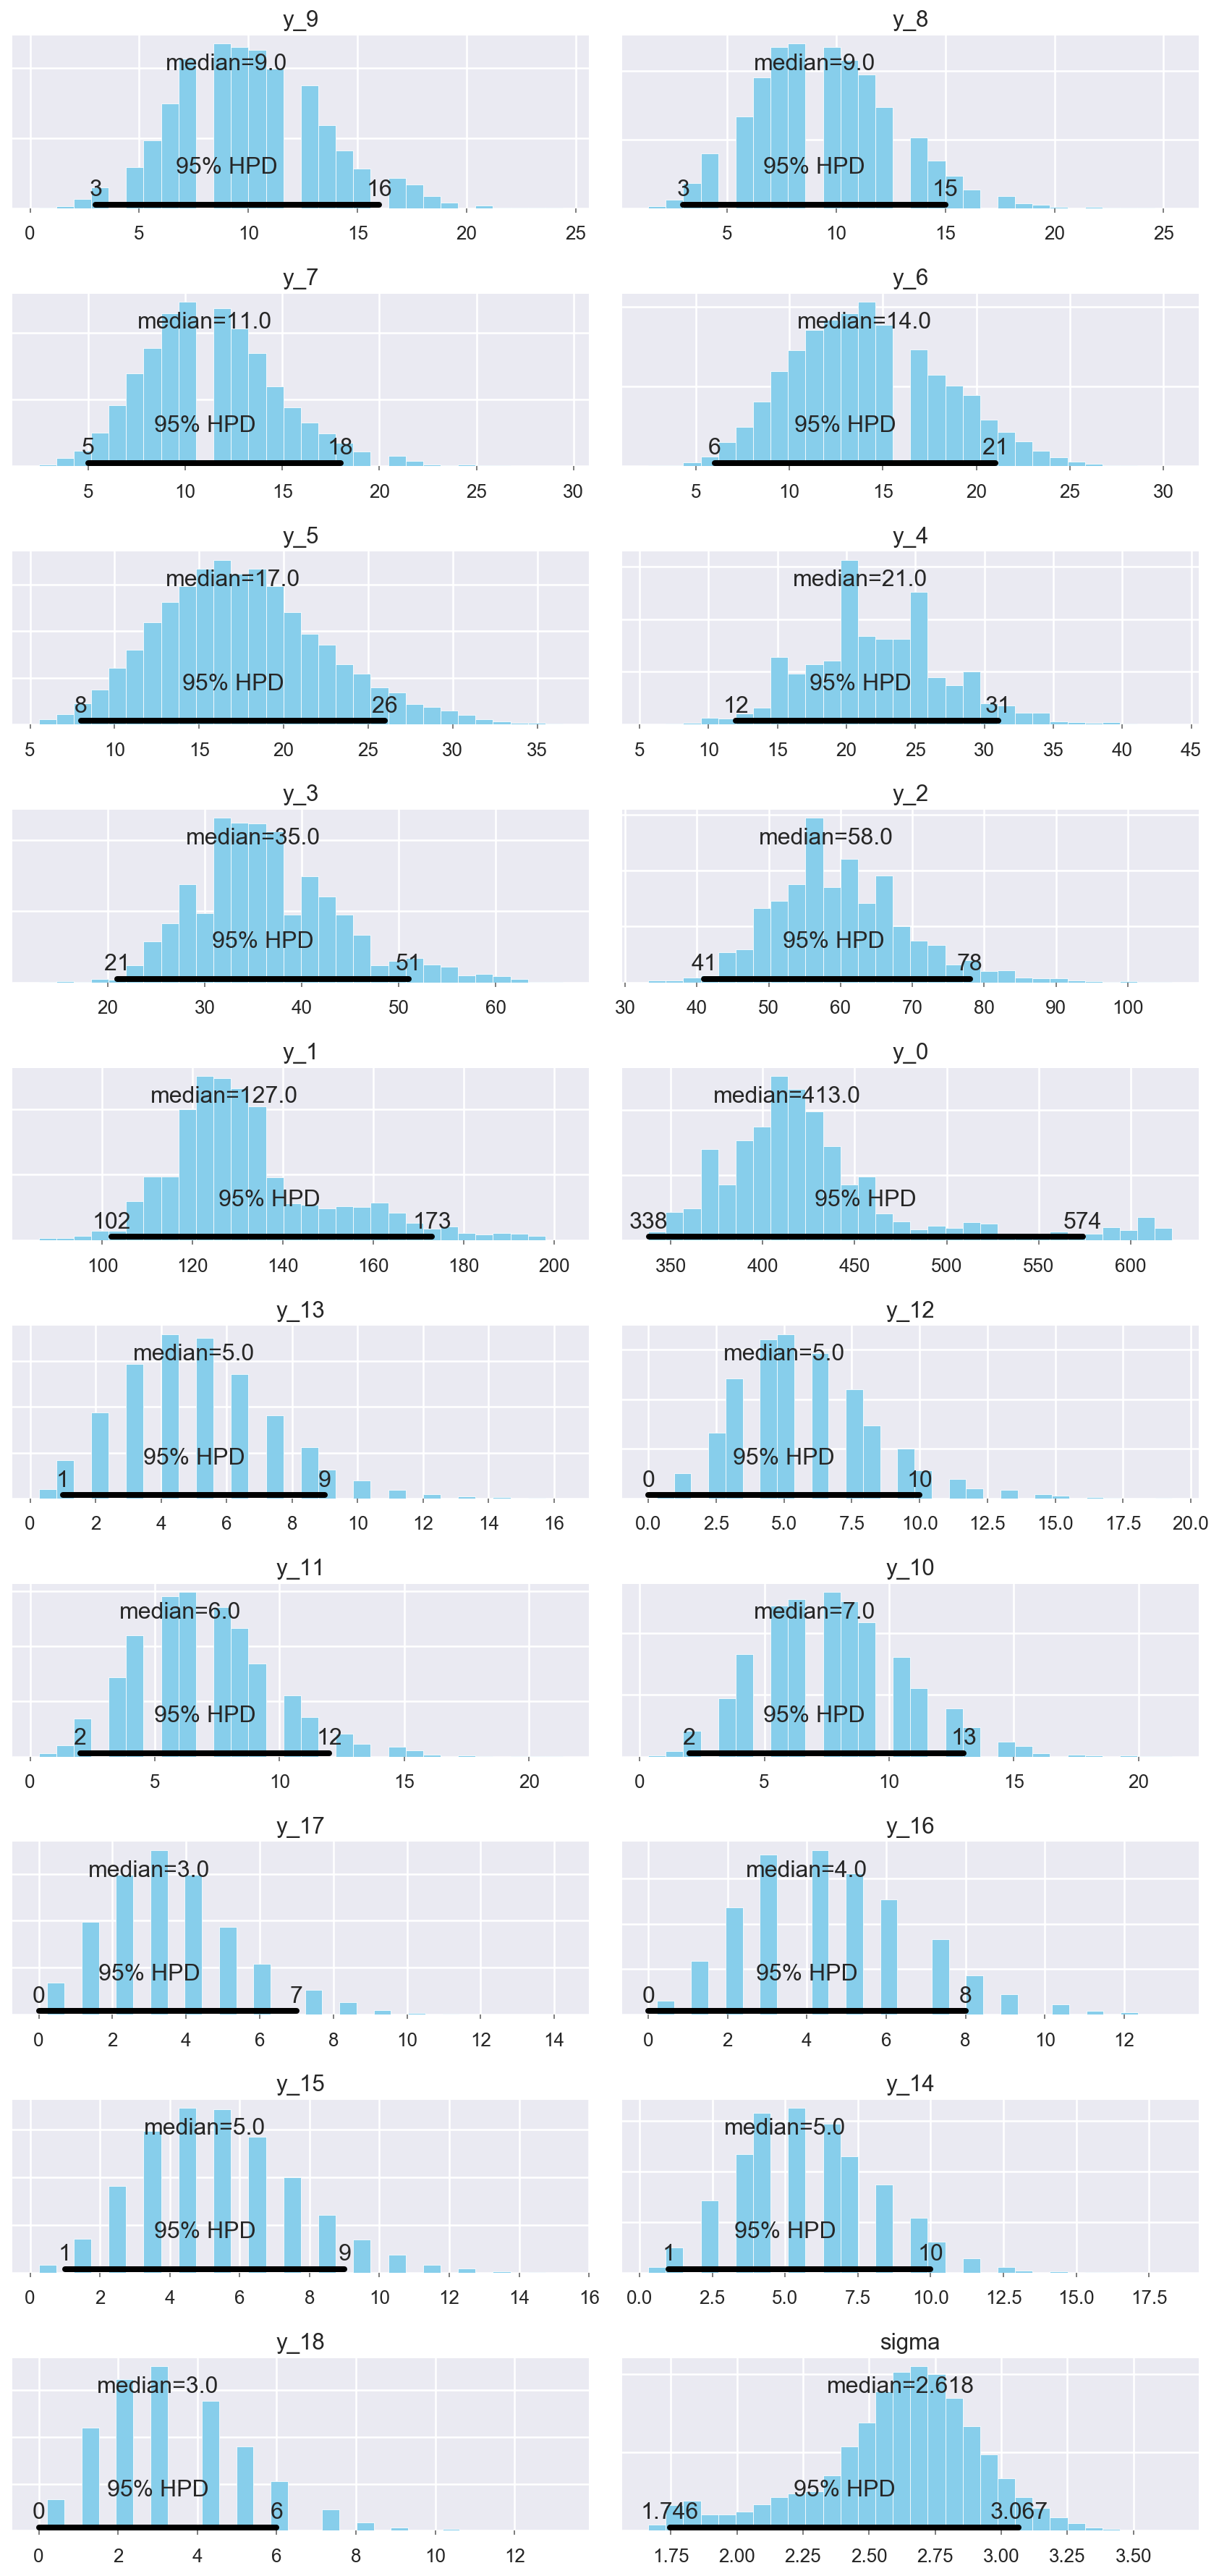

In [7]:
pm.plot_posterior(trace, point_estimate="median")

In [9]:
pm.diagnostics.gelman_rubin(trace)

{'sigma': 1.6821328916484339,
 'sigma_log_': 1.6854741952887975,
 'y': array([ 1.7326606 ,  1.58827342,  1.23512072,  1.23016058,  1.10004101,
         1.17058202,  1.0839251 ,  1.07937434,  1.06732656,  1.07004523,
         1.05736224,  1.05968761,  1.05418051,  1.02847936,  1.05904182,
         1.03747705,  1.04107698,  1.03208535,  1.02769501])}